**Clustering Genetic Algorithm**

Akan ditunjukkan aplikasi Algoritma Genetika pada proses Klastering titik-titik tertentu untuk menemukan solusi optimal pada masing-masing klasternya. Dalam aplikasi Algoritma Genetika ini, titik-titik dan jumlah klaster telah ditentukan sebelumnya.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

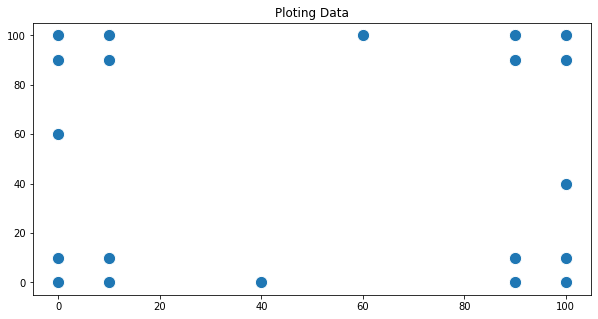

In [43]:
x = np.array([0, 10, 10,  0,  0,  60, 40, 100, 100, 100,  90, 90, 100, 100, 90, 90,  0,   0, 10, 10])
y = np.array([0,  0, 10, 10, 60, 100,  0,  40, 100,  90, 100, 90,   0,  10,  0, 10, 90, 100, 90, 100])

plt.figure(figsize=(10,5))
sns.scatterplot(x=x, y=y, s=150, palette="Set1")
plt.title("Ploting Data")
plt.show()

In [5]:
def Distance(x, y):
    dist = np.array([np.sqrt((x[i] - x)**2 + (y[i] - y)**2) for i in range(len(x))], dtype=int)
    
    return dist

In [6]:
def Fitness(p, dist):
    popFit = p.copy()
    popFit["fitness"] = [sum(list(map(lambda x: sum(dist[x]), p.iloc[i,:-1]))) for i in range(len(p))]
    
    return popFit

In [7]:
def CreatePopulation(n_chrom, cluster, n_point, dist):
    arr_pop = np.array([np.random.permutation(n_point)[:cluster] for i in range(n_chrom)])
    pop = pd.DataFrame(arr_pop)
    
    pop["fitness"] = 0
    pop = Fitness(pop, dist)
    
    return pop

In [8]:
def Crossover(pop, dist):
    n = len(pop)
    m = len(pop.keys()) - 1
    popc = pop.copy()
    
    for i in range(n):
        n1, n2 = np.random.permutation(n)[:2]
        idx = np.random.randint(0,m)
        
        temp1 = list(pop.iloc[n1,:-1])
        temp2 = list(pop.iloc[n2,:-1])
        
        if temp1[idx] in temp2:
            temp2.remove(temp1[idx])
            temp2.insert(idx,temp1[idx])
        else:
            temp2[idx] = temp1[idx]
        temp2.append(pop.iloc[n2,-1])
        
        popc.loc[i] = temp2
    
    popc = Fitness(popc, dist)
    
    return popc

In [9]:
def Mutation(popc, dist):
    n = len(popc)
    m = len(popc.keys()) - 1
    popm = popc.copy()
    
    for i in range(n):
        temp = list(map(lambda x: x-1 if x!=0 else max(popc.iloc[i,:-1]), popc.iloc[i,:-1]))
        temp.append(popc.iloc[i,-1])
        popm.loc[i] = temp
    
    popm = Fitness(popm, dist)
    
    return popm

In [10]:
def CombineAndSelection(pop, popc, popm):
    n = len(pop)
    
    popAll = pop.copy()
    popAll = popAll.append(popc, ignore_index=True)
    popAll = popAll.append(popm, ignore_index=True)
    
    popAll = popAll.sort_values(by=['fitness'])
    popAll.index = range(len(popAll))
    
    popAll = popAll.drop_duplicates()
    popAll = popAll.head(n)
    
    return popAll

In [11]:
def PredictCluster(chrom, n_point, dist):
    arr_index = np.arange(0, n_point)
    list_cluster = [np.array(list(map(lambda x: dist[x,idx], chrom))).argmin() for idx in arr_index]
    
    return list_cluster

In [63]:
def PlotSolution(x, y, cluster, Title=""):
    arr_index = np.arange(0, len(x))
    plt.figure(figsize=(10,5))
    sns.scatterplot(x, y , hue=cluster, style=cluster, s=150, palette="Set1", legend="full")
    
    plt.legend(title="Cluster")
    plt.title(Title)
    plt.show()

In [61]:
def ClusteringGeneticAlgorithm(x, y, n_chrom=10, cluster=2, p_cross=1, p_mut=1, 
                                    max_generate=10, plot_step=False, step=1):
    
    dist = Distance(x=x, y=y)
    
    pop = CreatePopulation(n_chrom, cluster, len(x), dist)
    PlotSolution(x, y, np.zeros(len(x), dtype=int), Title="Ploting Data Sebelum Klastering")
    print()

    for i in range(max_generate):
        pc = np.random.rand()
        pm = np.random.rand()

        popc = pop.copy()
        popm = pop.copy()

        if pc < p_cross:
            popc = Crossover(pop, dist)
            
        if pm < p_mut:
            popm = Mutation(popc, dist)
            
        pop = CombineAndSelection(pop, popc, popm)
        
        if plot_step and i%step==0:
            print()
            print('Clustering pada generasi ke',i)
            list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
            PlotSolution(x, y, list_cluster, Title="Ploting Clustering")
            
    print()
    print('Clustering akhir')
    list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
    PlotSolution(x, y, list_cluster, Title="Clustering Final")

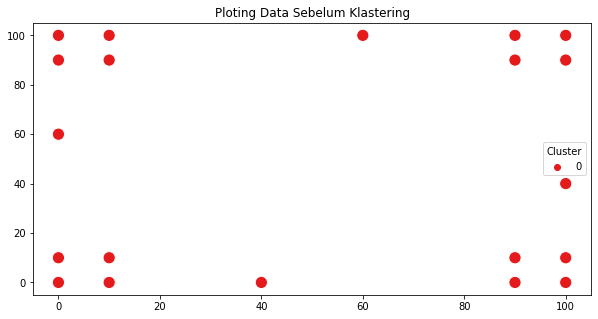



Clustering pada generasi ke 0


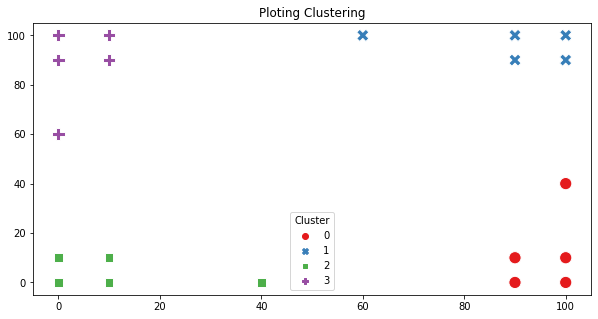


Clustering pada generasi ke 10


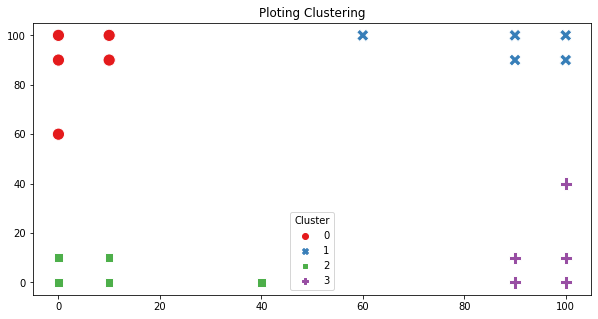


Clustering pada generasi ke 20


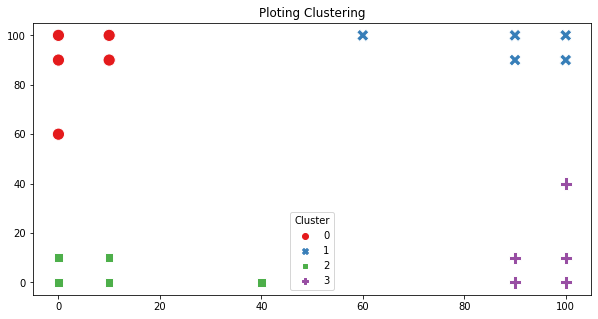


Clustering pada generasi ke 30


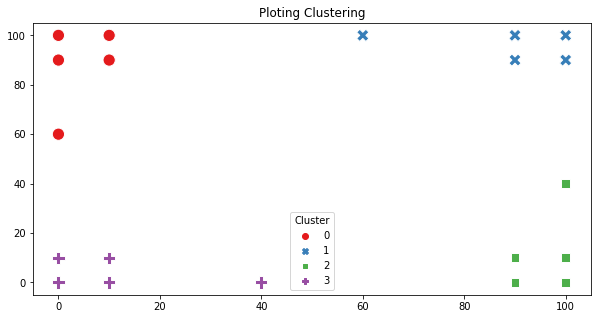


Clustering pada generasi ke 40


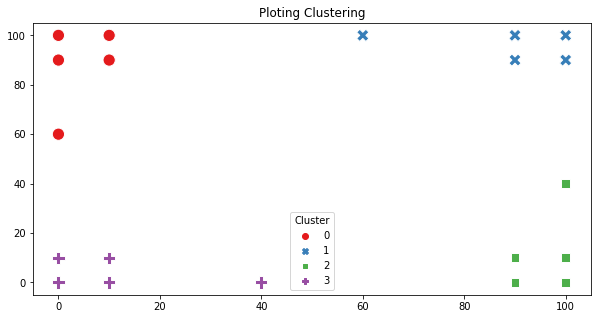


Clustering akhir


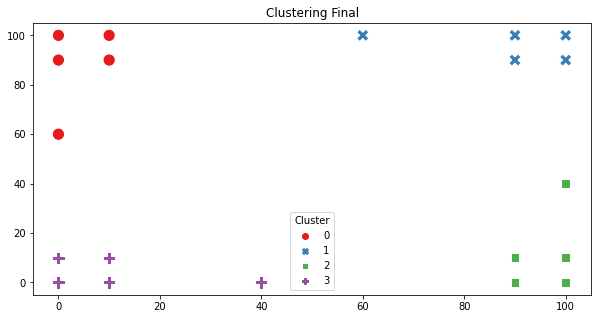

In [64]:
ClusteringGeneticAlgorithm(x, y, n_chrom=10, cluster=4, max_generate=50, plot_step=True, step=10)